In [1]:
import os
import datetime
import numpy as np
import scipy
from scipy import signal
from astropy.io import fits
import matplotlib.pyplot as plt
import matplotlib.dates as md
import stft

%matplotlib inline

In [5]:
#file = '/home/roman/mnt/server-space/storage/bolidozor/ZVPP/ZVPP-R6/meteors/2017/09/04/19/20170904192557959_ZVPP-R6_raws.fits'
file = '/home/roman/mnt/server-space/storage/bolidozor/svakov/SVAKOV-R12/meteors/2017/09/02/06/20170902062919368_SVAKOV-R12_raws.fits'

hdulist = fits.open(file)
scidata = hdulist[0].data
x = hdulist[0].header['NAXIS1']
y = hdulist[0].header['NAXIS2']
rx,ry = scidata.shape

flat_data = np.ravel(scidata.data)
print(flat_data)
complex_data  = flat_data[0::2] + 1j * flat_data[1::2]


[ 0.01434326  0.01773679  0.0015831  ...,  0.01518655 -0.01384676
  0.01514793]


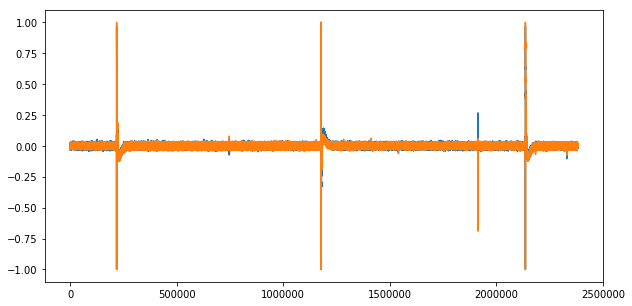

In [6]:
plt.figure(figsize=(10, 5))


plt.plot(complex_data.real)
plt.plot(complex_data.imag)

plt.show()

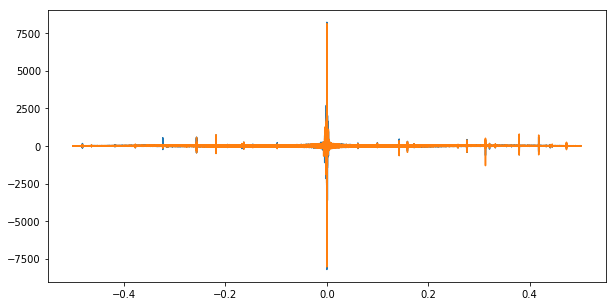

In [7]:
plt.figure(figsize=(10, 5))

sp = np.fft.fft(complex_data)
freq = np.fft.fftfreq(complex_data.shape[-1])

plt.plot(freq, sp.real)
plt.plot(freq, sp.imag)

plt.show()

In [93]:
specgram = stft.spectrogram(flat_data.real, framelength=4800*10, overlap = 10, hopsize = 1000, halved=False)

specgram.shape

(48000, 4801)

In [94]:
fits.writeto('output_file.fits', np.clip(specgram.real.T,-1,1), hdulist[0].header, clobber=True)